In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import sys
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Circle
import seaborn as sns; 
from IPython.display import HTML

In [3]:
#config parser
import configparser

sys.path.insert(0, '../Common/')
from AISDataManager import AISDataManager
import Constants as c
import HMUtils as hMUtil
import TimeUtils as timeUtils
from GridClass import GridClass

#MyConfig.INI stores all the run time constants
config = configparser.ConfigParser()
config.read('../MyConfig.INI')

from joblib import Parallel, delayed
import multiprocessing
aISDM = AISDataManager()

In [4]:
# lonMin = (float)(config['REGEION']['LON_MIN'])
# lonMax = (float)(config['REGEION']['LON_MAX'])

# latMin = (float)(config['REGEION']['LAT_MIN'])
# latMax = (float)(config['REGEION']['LAT_MAX'])

lonMin = (float)(-120.0)
lonMax = (float)(-119.0)

latMin = (float)(33.5)
latMax = (float)(34.5)

print(lonMin,latMin)
print(lonMax,latMax)

# increStep = (float)(config['HEATMAP']['INCR_STEP'])
# incrRes = (int)(config['HEATMAP']['INCR_RES'])

increStep = (float)(0.05)
incrRes = (int)(2)

-120.0 33.5
-119.0 34.5


In [5]:
heatMapGrid = hMUtil.generate_grid(lonMin, lonMax, latMin, latMax, increStep, incrRes)
boundaryArray = heatMapGrid[2]
horizontalAxis = heatMapGrid[0]
verticalAxis = heatMapGrid[1]

In [7]:
#first load all the arrays
#i.e from 40 to 48
#and we sum every element, we get
# probDir = "../Data/AIS_0117_1217_31_M120_345_M117/Transition/"
probDir = "../Data/AIS_SB/TenlyTP/"

tPList = []

for i in range(9):
#     probFile = probDir + '4' + str(i) + '.npy'
    probFile = probDir + str(i) + '.npy'
    probVal = np.load(probFile)
    tPList.append(probVal.copy()) 

#now sum of probabilities will be 1
sum44 = np.zeros(tPList[0].shape)
for i in range(len(tPList)):
    sum44 = sum44 + tPList[i]

In [8]:
print(len(boundaryArray))

400


In [9]:
#now generate transition probability tabel
#using boundary array
gridList = []

for i in range(len(boundaryArray)):
# for i in range(2):
#     print(boundaryArray[i])
    #left top transition probabilities
    gridIdx = boundaryArray[i][4]
    tempLonMin = boundaryArray[i][0]
    tempLonMax = boundaryArray[i][1]
    tempLatMin = boundaryArray[i][2]
    tempLatMax = boundaryArray[i][3]
    
    gridList.append(GridClass(gridIdx))
    
    gridList[-1].set_lon_min_max(tempLonMin,tempLonMax)
    gridList[-1].set_lat_min_max(tempLatMin,tempLatMax)
    
    #takes care of divide by zero condition
    if(sum44[gridIdx] > 0):
        p40 = tPList[0][gridIdx]/sum44[gridIdx]
        p41 = tPList[1][gridIdx]/sum44[gridIdx]
        p42 = tPList[2][gridIdx]/sum44[gridIdx]
        p43 = tPList[3][gridIdx]/sum44[gridIdx]
        p44 = tPList[4][gridIdx]/sum44[gridIdx]
        p45 = tPList[5][gridIdx]/sum44[gridIdx]
        p46 = tPList[6][gridIdx]/sum44[gridIdx]
        p47 = tPList[7][gridIdx]/sum44[gridIdx]
        p48 = tPList[8][gridIdx]/sum44[gridIdx]
    
        gridList[-1].set_p40(p40)
        gridList[-1].set_p41(p41)
        gridList[-1].set_p42(p42)
        gridList[-1].set_p43(p43)
        gridList[-1].set_p44(p44)
        gridList[-1].set_p45(p45)
        gridList[-1].set_p46(p46)
        gridList[-1].set_p47(p47)
        gridList[-1].set_p48(p48)

In [10]:
p40Probs = []
p41Probs = []
p42Probs = []
p43Probs = []
p44Probs = []
p45Probs = []
p46Probs = []
p47Probs = []
p48Probs = []

for grid in gridList:
    p40Probs.append(grid.p40)
    p41Probs.append(grid.p41)
    p42Probs.append(grid.p42)
    p43Probs.append(grid.p43)
    p44Probs.append(grid.p44)
    p45Probs.append(grid.p45)
    p46Probs.append(grid.p46)
    p47Probs.append(grid.p47)
    p48Probs.append(grid.p48)

In [11]:
p40ProbsNP = np.array(p40Probs)
p41ProbsNP = np.array(p41Probs)
p42ProbsNP = np.array(p42Probs)
p43ProbsNP = np.array(p43Probs)
p44ProbsNP = np.array(p44Probs)
p45ProbsNP = np.array(p45Probs)
p46ProbsNP = np.array(p46Probs)
p47ProbsNP = np.array(p47Probs)
p48ProbsNP = np.array(p48Probs)

In [12]:
print(np.mean(p40ProbsNP))
print(np.median(p40ProbsNP))
print(np.min(p40ProbsNP))
print(np.max(p40ProbsNP))
print(np.var(p40ProbsNP))

0.022352574094035876
0.0
0.0
0.2706567796610169
0.001894312503800798


In [13]:
print(np.mean(p41ProbsNP))
print(np.median(p41ProbsNP))
print(np.min(p41ProbsNP))
print(np.max(p41ProbsNP))
print(np.var(p41ProbsNP))

0.04878682533797431
0.025
0.0
0.4
0.0036291915522725176


In [14]:
print(np.mean(p42ProbsNP))
print(np.median(p42ProbsNP))
print(np.min(p42ProbsNP))
print(np.max(p42ProbsNP))
print(np.var(p42ProbsNP))

0.030552690838801584
0.006541296278467743
0.0
0.2777777777777778
0.002468052449671943


In [15]:
print(np.mean(p43ProbsNP))
print(np.median(p43ProbsNP))
print(np.min(p43ProbsNP))
print(np.max(p43ProbsNP))
print(np.var(p43ProbsNP))

0.12924225072221077
0.09664243277048155
0.0
1.0
0.018491268878409062


In [16]:
print(np.mean(p44ProbsNP))
print(np.median(p44ProbsNP))
print(np.min(p44ProbsNP))
print(np.max(p44ProbsNP))
print(np.var(p44ProbsNP))

0.35848624046178146
0.36319073083778963
0.0
1.0
0.048329645603236375


In [17]:
print(np.mean(p45ProbsNP))
print(np.median(p45ProbsNP))
print(np.min(p45ProbsNP))
print(np.max(p45ProbsNP))
print(np.var(p45ProbsNP))

0.15676914466271805
0.12372448979591837
0.0
1.0
0.02462297232160403


In [18]:
print(np.mean(p46ProbsNP))
print(np.median(p46ProbsNP))
print(np.min(p46ProbsNP))
print(np.max(p46ProbsNP))
print(np.var(p46ProbsNP))

0.021000685367465338
0.0016784223486839144
0.0
1.0
0.003390141233679705


In [19]:
print(np.mean(p47ProbsNP))
print(np.median(p47ProbsNP))
print(np.min(p47ProbsNP))
print(np.max(p47ProbsNP))
print(np.var(p47ProbsNP))

0.04570081257035403
0.022467239399817887
0.0
0.5
0.0038839651876499733


In [20]:
print(np.mean(p48ProbsNP))
print(np.median(p48ProbsNP))
print(np.min(p48ProbsNP))
print(np.max(p48ProbsNP))
print(np.var(p48ProbsNP))

0.02960877594465861
0.00597062807442789
0.0
0.5
0.0030663659216506323


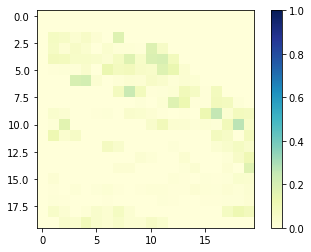

In [22]:
#lets plot the heatmap of all the probabilities
n40Disp = np.reshape(p40ProbsNP,(verticalAxis.shape[0],horizontalAxis.shape[0]))
n40Disp = np.flip(n40Disp,axis=0)

fig, ax = plt.subplots()
colBar = ax.imshow(n40Disp,cmap=plt.get_cmap('YlGnBu'),vmax = 1)

fig.colorbar(colBar)

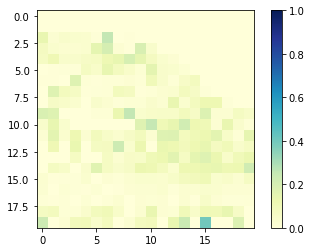

In [23]:
#lets plot the heatmap of all the probabilities
n41Disp = np.reshape(p41ProbsNP,(verticalAxis.shape[0],horizontalAxis.shape[0]))
n41Disp = np.flip(n41Disp,axis=0)

fig, ax = plt.subplots()
colBar = ax.imshow(n41Disp,cmap=plt.get_cmap('YlGnBu'), vmax = 1)

fig.colorbar(colBar)

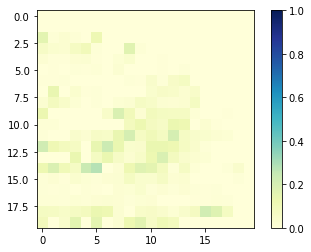

In [24]:
#lets plot the heatmap of all the probabilities
n42Disp = np.reshape(p42ProbsNP,(verticalAxis.shape[0],horizontalAxis.shape[0]))
n42Disp = np.flip(n42Disp,axis=0)

fig, ax = plt.subplots()
colBar = ax.imshow(n42Disp,cmap=plt.get_cmap('YlGnBu'), vmax = 1)

fig.colorbar(colBar)

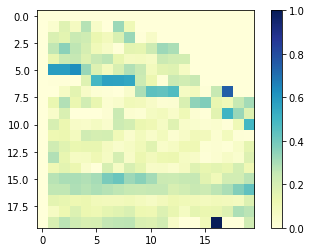

In [25]:
#lets plot the heatmap of all the probabilities
n43Disp = np.reshape(p43ProbsNP,(verticalAxis.shape[0],horizontalAxis.shape[0]))
n43Disp = np.flip(n43Disp,axis=0)

fig, ax = plt.subplots()
colBar = ax.imshow(n43Disp,cmap=plt.get_cmap('YlGnBu'), vmax = 1)

fig.colorbar(colBar)

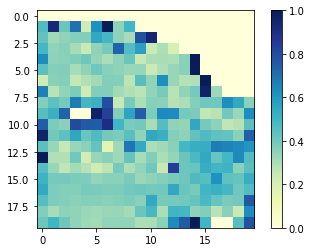

In [26]:
#lets plot the heatmap of all the probabilities
n44Disp = np.reshape(p44ProbsNP,(verticalAxis.shape[0],horizontalAxis.shape[0]))
n44Disp = np.flip(n44Disp,axis=0)

fig, ax = plt.subplots()
colBar = ax.imshow(n44Disp,cmap=plt.get_cmap('YlGnBu'),vmax = 1)

fig.colorbar(colBar)

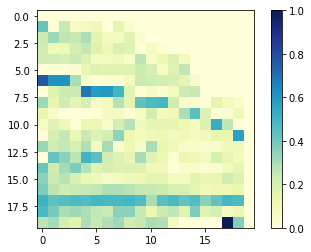

In [27]:
#lets plot the heatmap of all the probabilities
n45Disp = np.reshape(p45ProbsNP,(verticalAxis.shape[0],horizontalAxis.shape[0]))
n45Disp = np.flip(n45Disp,axis=0)

fig, ax = plt.subplots()
colBar = ax.imshow(n45Disp,cmap=plt.get_cmap('YlGnBu'),vmax = 1)

fig.colorbar(colBar)

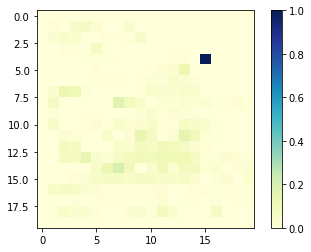

In [28]:
#lets plot the heatmap of all the probabilities
n46Disp = np.reshape(p46ProbsNP,(verticalAxis.shape[0],horizontalAxis.shape[0]))
n46Disp = np.flip(n46Disp,axis=0)

fig, ax = plt.subplots()
colBar = ax.imshow(n46Disp,cmap=plt.get_cmap('YlGnBu'),vmax = 1)

fig.colorbar(colBar)

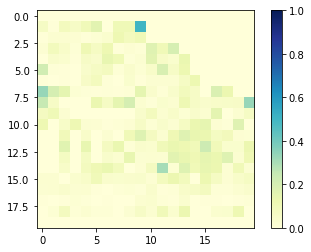

In [29]:
#lets plot the heatmap of all the probabilities
n47Disp = np.reshape(p47ProbsNP,(verticalAxis.shape[0],horizontalAxis.shape[0]))
n47Disp = np.flip(n47Disp,axis=0)

fig, ax = plt.subplots()
colBar = ax.imshow(n47Disp,cmap=plt.get_cmap('YlGnBu'),vmax = 1)

fig.colorbar(colBar)

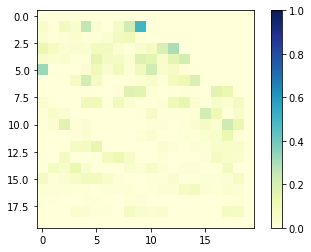

In [30]:
#lets plot the heatmap of all the probabilities
n48Disp = np.reshape(p48ProbsNP,(verticalAxis.shape[0],horizontalAxis.shape[0]))
n48Disp = np.flip(n48Disp,axis=0)

fig, ax = plt.subplots()
colBar = ax.imshow(n48Disp,cmap=plt.get_cmap('YlGnBu'),vmax = 1)

fig.colorbar(colBar)

In [28]:
for index in range(verticalAxis.shape[0] * horizontalAxis.shape[0]):
    print(p40ProbsNP[index] \
          + p41ProbsNP[index] \
          + p42ProbsNP[index] \
          + p43ProbsNP[index] \
          + p44ProbsNP[index] \
          + p45ProbsNP[index] \
          + p46ProbsNP[index] \
          + p47ProbsNP[index] \
          + p48ProbsNP[index] \
         )

1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999998
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
1.0
0.9999999999999998
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
1.0000000000000002
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
0.9999999999999998
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0000000000000002